<div style="float:left"><h1>  Your Personalized Food Travel Guide: Yelp Recommender System</h1></div>


**Author:** Alex Xue 

**Contact:** alex.xue15@gmail.com

**Date:** December 12th

## Table Of Contents 
1. [Introduction to this Notebook](#Introduction-to-this-Notebook)
    1. [Finalizing the Business Dataframe](#Finalizing-the-Business-Dataframe) 
2. [The Review Dataframe](#The-Review-Dataframe)
    1. [Positive Review Vectorizer](#Positive-Review-Vectorizer)
    2. [Negative Review Vectorizer](#Negative-Review-Vectorizer)
3. [Conclusion to this Notebook](#Conclusion-to-this-Notebook)

## Introduction to this Notebook

In this notebook we'll be finalizing the business dataframe by exploring the remaining columns. As well we'll be beginning our exploration of the Review dataset. We'll be using a count vectorizer in order to generate features based on the reviews.

### Finalizing the business dataframe

We'll be loading in the dataframe from the last notebook as our checkpoint. We'll need to clean up one last remaining columns before we can finish the exploration of this notebook. 

In [1]:
import numpy as np #importing numpy 
import pandas as pd #importing pandas 
import matplotlib.pyplot as plt #importing matplotlib
import re #importing regex
import seaborn as sns #importing seaborn
from sklearn.feature_extraction.text import CountVectorizer #importing our count vectorizer 

In [2]:
#Importing out where we left off in the last notebook
df_business_checkpoint=pd.read_csv("data/Businesses_by_state3.csv",index_col=0)

In [3]:
#Looking at the first 5 rows 
df_business_checkpoint.head()

,business_id,name,state,stars,review_count,is_open,BusinessParking_valet,WheelchairAccessible,km_distance_from_center,active,...,wash,water,wedding,wholesale,wigs,wine,wineries,wings,wraps,yogurt
0,xcgFnd-MwkZeO5G2HQ0gAQ,"""T & T Bakery and Cafe""",ON,4.0,38,1,0,0,26.389755,0,...,0,0,0,0,0,0,0,0,0,0
1,l09JfMeQ6ynYs5MCJtrcmQ,"""Alize Catering""",ON,3.0,12,0,0,0,6.512472,0,...,0,0,0,0,0,0,0,0,0,0
2,Gu-xs3NIQTj3Mj2xYoN2aw,"""Maxim Bakery & Restaurant""",ON,3.5,34,1,1,0,23.841292,0,...,0,0,0,0,0,0,0,0,0,0
3,lHYiCS-y8AFjUitv6MGpxg,"""Starbucks""",ON,4.0,21,1,0,0,3.516137,0,...,0,0,0,0,0,0,0,0,0,0
4,VSGcuYDV3q-AAZ9ZPq4fBQ,"""Sportster's""",ON,2.5,7,1,0,0,5.358913,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#looking at the last 5 rows 
df_business_checkpoint.tail()

,business_id,name,state,stars,review_count,is_open,BusinessParking_valet,WheelchairAccessible,km_distance_from_center,active,...,wash,water,wedding,wholesale,wigs,wine,wineries,wings,wraps,yogurt
32538,xqNpOnxY0XzdnUE4sjmg0w,"""Chaska""",ON,4.0,4,0,0,0,1.013712,0,...,0,0,0,0,0,0,0,0,0,0
32539,SvW3WsatQWvR8c1iwAD_QA,"""Urban House Cafe""",ON,4.0,32,0,0,0,1.326022,0,...,0,0,0,0,0,0,0,0,0,0
32540,nGjEV4bn0DPk8bcb0C6Aig,"""Sweet Serendipity Bake Shop""",ON,4.5,22,1,0,0,5.173640,0,...,0,0,0,0,0,0,0,0,0,0
32541,pUhU5ohYv65g8B47dTXAKA,"""Starbucks""",NV,2.5,35,1,0,0,2.295815,0,...,0,0,0,0,0,0,0,0,0,0
32542,kLFm_kehXNZkUc1oa2-Eaw,"""Nuno's Churrasqueira""",ON,3.0,4,1,0,0,4.311081,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Finding the number of rows 
df_business_checkpoint.shape[0]

26506

Looking at the top 5 rows and bottom 5 rows is a quick check to make sure everything was imported and read correctly. We also see the same number of columns as we had before. Looking at the tail is important here as we know that the indexes shouldn't have reset as we did take some businesses out of this dataframe. We can see this is the case because the last indexes are a larger number than the number of rows in the dataframe. Indexes will be important to keep track of as later on we may reset indexes in order to make the process simpler. However we will usually have business ID in order to get the original indexes. 

Lets also do a quick null value check as we should have 0.

In [6]:
#Finding the null values
df_business_checkpoint.isna().sum().sum()

0

Now that we've done the preliminary checks on the dataframe, we should focus on processing the last numeric/non-descriptive column in the original business csv, which is `is_open`

#### `is_open` column

In [7]:
#Checking the value counts of is_open
df_business_checkpoint['is_open'].value_counts()

1    19542
0     6964
Name: is_open, dtype: int64

The immediate thought that comes up with this column, is that if a business isn't open we shouldn't include them in our recommender system. Thats a valid thought, but if we were to remove businesses we would be losing reviews and data on these businesses that could be used to train our system. Additionally, while in a real world situation you wouldn't want to recommend a business thats closed, the dataset we're using is from 2018, almost 5 years ago, and pre-pandemic which had a large impact on the industry. As we can't reliably trust this information, we'll drop the column in this case but acknowledge that when implementing this in a more recent dataset, or one that's actively being updated, this would be an additional filter used when recommending.

In [8]:
#Dropping the `is_open` column from our dataframe 
df_business_checkpoint.drop(columns='is_open',inplace=True)

In [9]:
#Looking at the top 1 row
df_business_checkpoint.head(1)

,business_id,name,state,stars,review_count,BusinessParking_valet,WheelchairAccessible,km_distance_from_center,active,adult,...,wash,water,wedding,wholesale,wigs,wine,wineries,wings,wraps,yogurt
0,xcgFnd-MwkZeO5G2HQ0gAQ,"""T & T Bakery and Cafe""",ON,4.0,38,0,0,26.389755,0,0,...,0,0,0,0,0,0,0,0,0,0


Now that we've worked with the business dataframe, lets move onto the next dataset we had, which is the reviews data but first, we'll need to change the name of the stars column to not confuse it with the review stars column

In [10]:
#Here we're changing the name of the business dataframe to not confuse it with the stars from reviews
df_business_checkpoint=df_business_checkpoint.rename(columns={'stars':'avg_stars'})

## The Review Dataframe

In [11]:
#This is reading in the review dataframe 
df_reviews=pd.read_csv("data/Yelp_dataset_old/yelp_review.csv")

Lets take a quick look at the reviews

In [12]:
df_reviews.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [13]:
df_reviews.shape[0]

5261668

We can see that there are some identifier columns like user_id and review_id, additionally we see business_id which we can use to merge our dataframes. We also see that each review has a data and stars count attached to the general text. We also see the last 3 columns which are reactions that other users put on the review as a way of judging the review. First, lets rename the stars column to not confuse them. In total we have just over 5 million reviews.

In [14]:
#renaming the stars columns 
df_reviews=df_reviews.rename(columns={'stars':'Review_star'})

In [15]:
#looking at the top 5 rows 
df_reviews.head()

,review_id,user_id,business_id,Review_star,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


We can see that our change has worked and we can proceed with merging the two `df_business_checkpoint` with the `df_reviews`

We'll be doing a left join, which is to mean that we only want the reviews that are associated with the businesses we have selected but we don't want to lose businesses that have no reviews. We don't want to do a full join as we don't want reviews that aren't associated with the selected businesses.

In [16]:
#Left join to keep businesses without reveiws
df_reviews_merged=pd.merge(df_business_checkpoint,df_reviews,on='business_id',how='left')

In [17]:
#looking at the first 5 rows of the newly merged df
df_reviews_merged.head()

,business_id,name,state,avg_stars,review_count,BusinessParking_valet,WheelchairAccessible,km_distance_from_center,active,adult,...,wraps,yogurt,review_id,user_id,Review_star,date,text,useful,funny,cool
0,xcgFnd-MwkZeO5G2HQ0gAQ,"""T & T Bakery and Cafe""",ON,4.0,38,0,0,26.389755,0,0,...,0,0,0WaSfUvfuw_py2t6rYfgcA,JnXYIUYuFkGGxgneBkmeBw,5,2016-06-05,It's sad to read all these shallow reviews of ...,2,0,0
1,xcgFnd-MwkZeO5G2HQ0gAQ,"""T & T Bakery and Cafe""",ON,4.0,38,0,0,26.389755,0,0,...,0,0,npO0_q1OAnoGz5oyXz9t1A,PBV_oQCoABX958-zjiLGwQ,2,2015-10-21,Re-reviewing this restaurant after our last 2 ...,2,1,0
2,xcgFnd-MwkZeO5G2HQ0gAQ,"""T & T Bakery and Cafe""",ON,4.0,38,0,0,26.389755,0,0,...,0,0,-qf5sss_W53W0hN8bXTVYw,_f5fHijZb6xocu_jNeZvPA,5,2012-08-19,I'm always excited to go there for breakfast! ...,2,1,1
3,xcgFnd-MwkZeO5G2HQ0gAQ,"""T & T Bakery and Cafe""",ON,4.0,38,0,0,26.389755,0,0,...,0,0,asbgm-pDBk55ZIy9NuRnug,148jNH5eI1ZHXLOm1DHiFg,5,2015-04-05,"This place is absolutely awesome.\n\nCheap, go...",1,2,0
4,xcgFnd-MwkZeO5G2HQ0gAQ,"""T & T Bakery and Cafe""",ON,4.0,38,0,0,26.389755,0,0,...,0,0,_E-LFY0YnjwwiZ1K0m8cuw,abG99DJ23yOBkhaqICuFyA,5,2014-02-03,This place is an iconic spot in Markham Villag...,1,0,0


We can see that we were successful in our merge, now lets see how many different reviews we lost and how many are left over.

In [18]:
#Looking at how many reviews we lost 
df_reviews.shape[0]-df_reviews_merged.shape[0]

3567660

In [19]:
#looking at how many reviews we had 
df_reviews_merged.shape[0]

1694008

In [20]:
#Looking at unique values for reviews 
df_reviews_merged['Review_star'].unique()

array([5, 2, 1, 3, 4])

We lost around 2/3 of the reviews and were left with 1/3 of the total reviews. ~1.7 million is still a large enough number for us to use for our purpose. We also see the reviews are integers from 1-5. This means there are no .5 ratings. This will be important when we're splitting up the data into good versus bad review.

Now lets take a look and see if we can see any difference in the way Ontario businesses and Nevada are rated

In [21]:
#looking at the reviews from ontario Businesses 
df_Ontario_reviews=df_reviews_merged[df_reviews_merged['state'].str.contains('ON')]

In [22]:
#looking at the reviews from Nevada businesses 
df_nevada_reviews=df_reviews_merged[df_reviews_merged['state'].str.contains('NV')]

Here we create separate for our Nevada and Ontario data 

In [23]:
#looking at the summary stats of the Ontario reviews
df_Ontario_reviews['Review_star'].describe()[1:]

mean    3.559800
std     1.274341
min     1.000000
25%     3.000000
50%     4.000000
75%     5.000000
max     5.000000
Name: Review_star, dtype: float64

In [24]:
#Looking at the summary stats of the Nevada Dataframe 
df_nevada_reviews['Review_star'].describe()[1:]

mean    3.739595
std     1.375491
min     1.000000
25%     3.000000
50%     4.000000
75%     5.000000
max     5.000000
Name: Review_star, dtype: float64

Both of them seem to have similar means with Ontario having a slightly lower mean. The 50% median for both is 4.0, so we could use that as the divider for a good versus a bad review. Since the scale is 1-5 without floats, it's possible that 4 actual covers a much wider net than we hope, making the split not exactly 50:50. So another perfectly reasonable explanation may be that 3 or even 5 is actually the divider as to what is a bad or good review, but to start lets see the value counts of each number. 

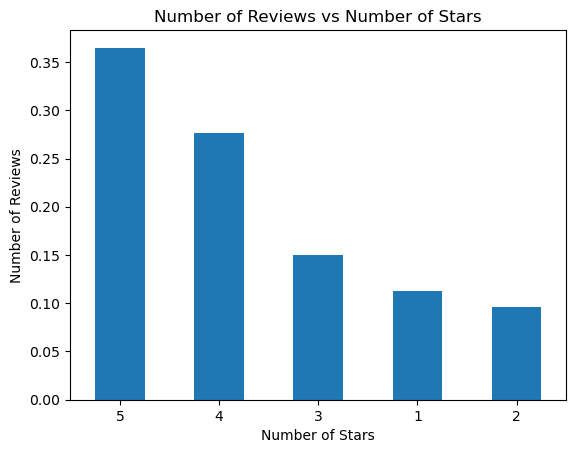

In [25]:
#Looking at the value counts 
plt.figure()
df_reviews_merged['Review_star'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Number of Stars')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.title('Number of Reviews vs Number of Stars')
plt.show()

We see that picking 5 as the breakpoint for create a similar 65:35 split in this case for negative reviews, and splitting by 3 would just create a bigger imbalance. As a result, we'll choose 4 as our breakpoint

In [26]:
#Creating a new column where a review is marked as a positive review if its above or equal to 4
df_reviews_merged['positive_review']=np.where(df_reviews_merged['Review_star']>=4.0,1,0)

In [27]:
#checking the number of positive reviews 
df_reviews_merged['positive_review'].sum()

1086565

In this case we have just under 1.1 million positive reviews and the rest is labeled as non-positive reviews.

We'll do the same thing with negative reviews.

In [28]:
#Creating the negative_review column 
df_reviews_merged['negative_review']=np.where(df_reviews_merged['Review_star']<4.0,1,0)

In [29]:
#Finding the number of total negative reviews 
df_reviews_merged['negative_review'].sum()

607443

We see we have around ~600k negative reviews. Now that we have both columns, we'll add the amount to each business in order to add 2 features to each business. So each business will have one column which is the number of positive reviews and the other is the number of negative reviews. 

In [30]:
#Creating the two columns for each business
df_number_reviews=df_reviews_merged.groupby('business_id').sum()[['positive_review','negative_review']]

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_22077/3081560405.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_number_reviews=df_reviews_merged.groupby('business_id').sum()[['positive_review','negative_review']]


In [31]:
#Taking a look at the first 5 of the created df
df_number_reviews.head()

,positive_review,negative_review
business_id,,
--6MefnULPED_I942VcFNA,17,20
--9e1ONYQuAa-CB_Rrw7Tw,1104,347
--DaPTJW3-tB1vP-PfdTEg,25,14
--FBCX-N37CMYDfs790Bnw,75,33
--SrzpvFLwP_YFwB_Cetow,26,18


We can see that for some businesses they have a large number of positive reveiws and negative reviews, while others have slightly more negative than positive.  Now we can merge this back to our `df_business_checkpoint`. Again we'll use a left join. 

In [32]:
#Left join of the businesses and positive and negative reviews
df_business_reviews_merged=pd.merge(df_business_checkpoint,df_number_reviews,on='business_id',how='left')

Now that we've merged our dataframes, lets take a look at how the areas compare

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_22077/888385203.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_business_reviews_merged.groupby('state').mean()['positive_review'].plot(kind='bar') #Creating a bar plot
/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_22077/888385203.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_business_reviews_merged.groupby('state').mean()['negative_review'].plot(kind='bar') #Creating a bar plot


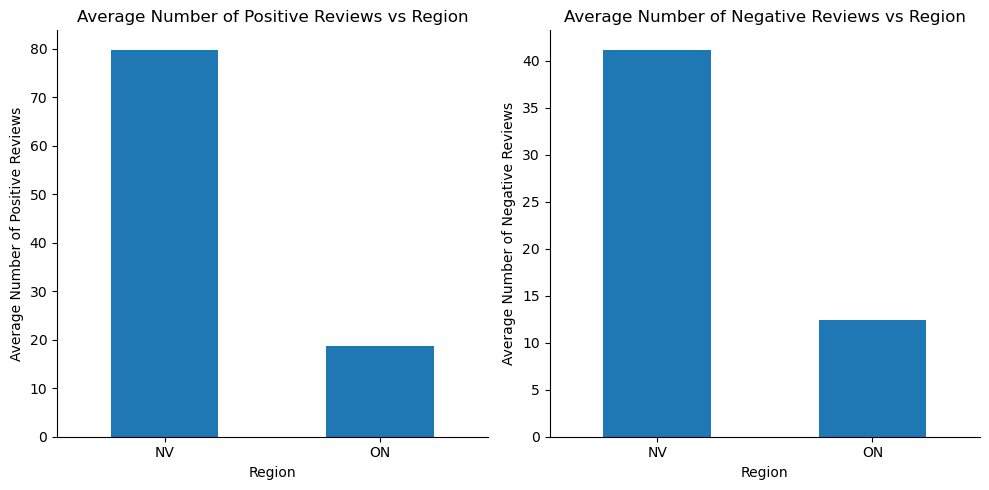

In [33]:
plt.subplots(1,2,figsize=(10,5)) #Creating the subplot

plt.subplot(1,2,1) #Selecting the grid position 
#ploting the positive reviews 
df_business_reviews_merged.groupby('state').mean()['positive_review'].plot(kind='bar') #Creating a bar plot
plt.xlabel('Region')
plt.ylabel('Average Number of Positive Reviews')
plt.xticks(rotation=0)
plt.title('Average Number of Positive Reviews vs Region')
sns.despine() #Despining the graph

plt.subplot(1,2,2) #Selecting the grid position 
#plotting the negative reviews
df_business_reviews_merged.groupby('state').mean()['negative_review'].plot(kind='bar') #Creating a bar plot
plt.xlabel('Region')
plt.ylabel('Average Number of Negative Reviews')
plt.xticks(rotation=0)
plt.title('Average Number of Negative Reviews vs Region')
sns.despine()#Despining the graph

plt.tight_layout() #making the graphs tight beside each other  
plt.show() #showing the graphs

We can see that the Average Number of Positive Reviews for NV and ON are different. This is to be expected as Nevada had a much larger average number of reviews per business. We see a similar visual with negative, with the negative proportion being slightly larger in Ontario. This is expected as Ontario had a slightly lower mean. Now we can proceed to try to create some features out of the text in these columns.

### Positive Review Vectorizer 

In order to get features out of the text data, we'll be trying to use a count vectorizer to try to get some common words that appear in these reviews. To do this we'll be splitting them into common words in positive reviews and common words in negative words. While the traditional approach is to try to find the best words that are indicative of some target variable, in our case we're just simply looking for common words that can link different restaurants together as we don't necessarily have a target variable. 

In [34]:
#taking a look at the first 5 rows
df_reviews_merged.head()

,business_id,name,state,avg_stars,review_count,BusinessParking_valet,WheelchairAccessible,km_distance_from_center,active,adult,...,review_id,user_id,Review_star,date,text,useful,funny,cool,positive_review,negative_review
0,xcgFnd-MwkZeO5G2HQ0gAQ,"""T & T Bakery and Cafe""",ON,4.0,38,0,0,26.389755,0,0,...,0WaSfUvfuw_py2t6rYfgcA,JnXYIUYuFkGGxgneBkmeBw,5,2016-06-05,It's sad to read all these shallow reviews of ...,2,0,0,1,0
1,xcgFnd-MwkZeO5G2HQ0gAQ,"""T & T Bakery and Cafe""",ON,4.0,38,0,0,26.389755,0,0,...,npO0_q1OAnoGz5oyXz9t1A,PBV_oQCoABX958-zjiLGwQ,2,2015-10-21,Re-reviewing this restaurant after our last 2 ...,2,1,0,0,1
2,xcgFnd-MwkZeO5G2HQ0gAQ,"""T & T Bakery and Cafe""",ON,4.0,38,0,0,26.389755,0,0,...,-qf5sss_W53W0hN8bXTVYw,_f5fHijZb6xocu_jNeZvPA,5,2012-08-19,I'm always excited to go there for breakfast! ...,2,1,1,1,0
3,xcgFnd-MwkZeO5G2HQ0gAQ,"""T & T Bakery and Cafe""",ON,4.0,38,0,0,26.389755,0,0,...,asbgm-pDBk55ZIy9NuRnug,148jNH5eI1ZHXLOm1DHiFg,5,2015-04-05,"This place is absolutely awesome.\n\nCheap, go...",1,2,0,1,0
4,xcgFnd-MwkZeO5G2HQ0gAQ,"""T & T Bakery and Cafe""",ON,4.0,38,0,0,26.389755,0,0,...,_E-LFY0YnjwwiZ1K0m8cuw,abG99DJ23yOBkhaqICuFyA,5,2014-02-03,This place is an iconic spot in Markham Villag...,1,0,0,1,0


We can see that some reviews are now correctly tagged as positive or negative. We also see that in the text, we have a lot of punctuation, we'll want to strip the punctuation before we proceed by creating our input dataframe.

In [35]:
#Stripping the text column
df_reviews_merged['text']=df_reviews_merged['text'].str.strip() 

In [36]:
#Creating our input dataframe of X_positive 
X_positive=df_reviews_merged[df_reviews_merged['positive_review']==1][['business_id','review_id','text']]

We'll take the positive reviews from the df_reviews_merged. We'll be only taking a select few columns, like text 

In [37]:
#Looking at the number of unique reviews 
X_positive['review_id'].nunique()

1086565

We see the same umber of unique positive columns as before. We're also not processing Nevada and Toronto differently despite potential differences in colloquial terms. This is because the goal is to be able to find words that appear in both of these areas as a bridge to connect the businesses.

In [38]:
#Looking at the null values
X_positive['review_id'].isna().sum()

0

We see we have no null values, so we can proceed with the vectorizer. In this case we'll be using a harsh min_df of 50000. This is largely a computational issue. While using a lower min_df and seeing the smaller groups of words would be great to have and help create little subgroups within our data, we simply don't have the computation necessary to generate that many features. As well, a harsh min_df helps lower the number of features we're getting which is important as too many features is also a computational burden. That being said 50000 was a number that was found through trial and error on my specific device. Since we have around 1 million positive reviews, this leads to a min_df that filters out words that occur less than 1/20 reviews.

In [39]:
#Creating the vectorizer and fitting it to our text
bagofwords = CountVectorizer(stop_words="english",min_df=50000)
bagofwords.fit(X_positive['text'])

CountVectorizer(min_df=50000, stop_words='english')

In [40]:
#Transforming the text
X_transformed_positive = bagofwords.transform(X_positive['text']) 


In [41]:
#showing the dimensions of the sparse matrix 
X_transformed_positive

<1086565x145 sparse matrix of type '<class 'numpy.int64'>'
	with 15078388 stored elements in Compressed Sparse Row format>

We can see that our sparse matrix we created has about 15 million stored elements in it. We also see that we've gotten 145 words in our positive class. Lets take a deeper look at these columns. 

In [42]:
#Creating our word count sum
word_counts_sum = pd.DataFrame(
    #transforming the sparse matrix to an array and summing them
    {"counts": X_transformed_positive.toarray().sum(axis=0)},
    #getting the names as indexs
    index=bagofwords.get_feature_names()
    #sorting by counts 
).sort_values("counts", ascending=False)

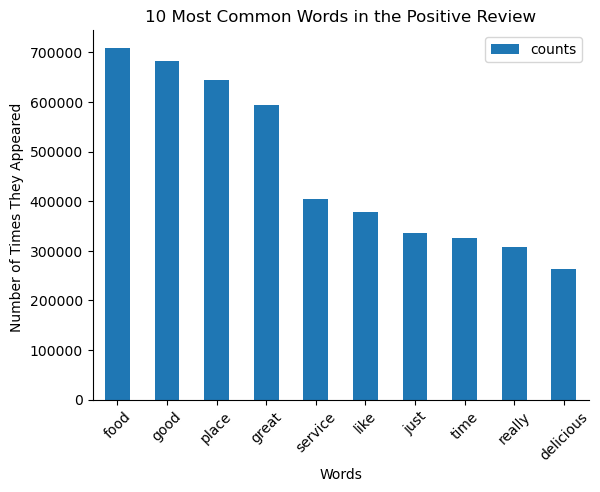

In [43]:
word_counts_sum.head(10).plot(kind='bar')
plt.xlabel('Words')
plt.ylabel('Number of Times They Appeared ')
plt.xticks(rotation=45)
plt.title('10 Most Common Words in the Positive Review')
sns.despine()#Despining the graph
plt.show()

We're seeing a lot of common positive words like place, good, delicious. We're also seeing words like food, time, like come up. For the sake of this project we'll proceed with these words, as we do want words that come often enough to connect restaurants together.  

Now we will create the dense matrix that we'll be adding to our dataframe. First we'll add a prefix of p^ to these words to differentiate them from their negative counterpart.

In [44]:
#getting the list of words
name_list=bagofwords.get_feature_names()

In [45]:
#defining our string
string='p^'
#adding our string to our list to create a new list of words
my_new_list = [string +x for x in name_list]

In [46]:
my_new_list[0]

'p^10'

We can see that our new list of words has a p^ in front of them. Now instead of turning our transformed words into a dataframe. We'll be using the column names as our new list of words and our indexs will the same indexes from the `X_positive` dataframe. This will allow us to concat the new dataframe to our `X_positive`.

In [47]:
#Creating our dataframe 
word_counts_positive = pd.DataFrame(
    #transforming the words to a dense matrix
    X_transformed_positive.todense(),
    #column names come from our new list of words with the prefix
    columns=my_new_list,
    #indexes come from X_positive 
    index=X_positive.index
)

In [48]:
#Checking the shape
word_counts_positive.shape[0]==X_positive.shape[0]

True

Here we're checking the shape of our new dataframe to make sure its the same as our `X_positive` dataframe. After that we'll create a new dataframe that will be then used to groupby the business_id in order to sum out the values. This means that each column will represent the number of times that particular word was used in a review of that specific business. 

In [49]:
#Now we create a new dataframe called df_positive 
new_df_positive = pd.concat([X_positive,word_counts_positive],axis=1)

In [50]:
#Summing up the words by business_id
df_positive_business_words=new_df_positive.groupby('business_id').sum()

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_22077/3958716478.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_positive_business_words=new_df_positive.groupby('business_id').sum()


In [51]:
df_positive_business_words.head(1)

,p^10,p^amazing,p^area,p^atmosphere,p^attentive,p^awesome,p^bad,p^bar,p^beef,p^best,...,p^try,p^ve,p^vegas,p^visit,p^wait,p^want,p^wasn,p^way,p^went,p^worth
business_id,,,,,,,,,,,,,,,,,,,,,
--6MefnULPED_I942VcFNA,1,1,4,0,1,0,1,0,2,16,...,4,4,0,1,2,4,0,1,1,2


Looking at the above, you see words like best appeared 16 times throughout all reviews for this dataframe. Now that we've done this for the positive reviews, we'll now shift our focus to the negative reviews and do the same process.

### Negative Review Vectorizer 

The process is analogous to the positive one. We'll start by creating our input dataframe then check the count and null values to make sure everything is working as it should. 

In [52]:
#Creating our input dataframe of X_negative 
X_negative=df_reviews_merged[df_reviews_merged['negative_review']==1][['business_id','review_id','text']]

In [53]:
#Looking at the negative review number
X_negative['review_id'].nunique()

607443

In [54]:
#Checking the null values 
X_negative['review_id'].isna().sum()

0

The shape is correct and there are no null values so we can proceed. We'll be using the same min_df as the positive review vectorizer which was 50000.

In [55]:
#Creating the vectorizer and fitting it to our text
bagofwords2 = CountVectorizer(stop_words="english",min_df=50000)
bagofwords2.fit(X_negative['text'])

CountVectorizer(min_df=50000, stop_words='english')

In [56]:
#Transforming the text 
X_transformed_negative = bagofwords2.transform(X_negative['text']) 


In [57]:
#Taking a look at the sparse matrix 
X_transformed_negative

<607443x73 sparse matrix of type '<class 'numpy.int64'>'
	with 6621606 stored elements in Compressed Sparse Row format>

Taking a look at the sparse matrix, we have around 6.6 million stored elements with 73 negative review. While these are less features coming from the negative review aspect, we also had an imbalance initially. As well, since this is a recommender system, positive things that are shared between businesses are the aspect we want to focus on. Now that we have our sparse matrix, we'll do the same process of looking at the top 10 most common words.

In [58]:
#Creating our word count sum
word_counts_sum2 = pd.DataFrame(
    #transforming the sparse matrix to an array and summing them
    {"counts": X_transformed_negative.toarray().sum(axis=0)},
    #getting the names as indexs
    index=bagofwords2.get_feature_names()
    #sorting by counts 
).sort_values("counts", ascending=False)

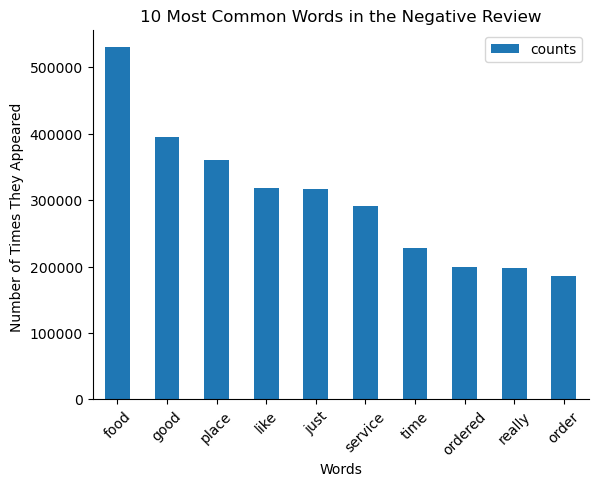

In [59]:
word_counts_sum2.head(10).plot(kind='bar')
plt.xlabel('Words')
plt.ylabel('Number of Times They Appeared ')
plt.xticks(rotation=45)
plt.title('10 Most Common Words in the Negative Review')
sns.despine()#Despining the graph
plt.show()

Looking at the negative reviews, we're seeing some words that make sense, like time and service. However we're also seeing words that don't make as much sense like good. However, this may be a product of how we split our reviews, as someone who rated a restaurant as a 3 might consider that just good, not great. Regardless, we'll move forward with creating the dense matrix. As like before, we'll first add a prefix of n^

In [60]:
#Creating the name list
name_list=bagofwords2.get_feature_names()

In [61]:
#Adding the string to the beginning of the words 
string='n^'
my_new_list2 = [string +x for x in name_list]

In [62]:
#Displaying one of them
my_new_list2[0]

'n^10'

Now we can see that we added the prefix, we can create our dataframe and then concat the dataframe to our original `X_negative`

In [63]:
#Creating our dataframe 
word_counts_negative = pd.DataFrame(
    #transforming the words to a dense matrix
    X_transformed_negative.todense(),
    #column names come from our new list of words with the prefix
    columns=my_new_list2,
    #indexes come from X_positive 
    index=X_negative.index
)

In [64]:
#Taking a look at the top 5 rows 
word_counts_negative.head()

,n^10,n^asked,n^bad,n^bar,n^best,n^better,n^bit,n^came,n^chicken,n^come,...,n^took,n^try,n^ve,n^vegas,n^wait,n^want,n^wanted,n^wasn,n^way,n^went
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10,0,0,0,0,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0
17,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see that the words now have the n prefix so we can now concat that to our original dataframe. Then we'll be summing based on the business_id as before to get the number of times that words appear in negative reviews for those businesses.

In [65]:
#concatting to the original dataframe
new_df_negative = pd.concat([X_negative,word_counts_negative],axis=1)

In [66]:
df_negative_business_words=new_df_negative.groupby('business_id').sum()

/var/folders/wd/_ly9th917n5cfwyp82k_61wr0000gn/T/ipykernel_22077/9777099.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_negative_business_words=new_df_negative.groupby('business_id').sum()


In [67]:
df_negative_business_words.head()

,n^10,n^asked,n^bad,n^bar,n^best,n^better,n^bit,n^came,n^chicken,n^come,...,n^took,n^try,n^ve,n^vegas,n^wait,n^want,n^wanted,n^wasn,n^way,n^went
business_id,,,,,,,,,,,,,,,,,,,,,
--6MefnULPED_I942VcFNA,2,3,4,0,7,8,4,2,3,13,...,0,5,7,0,3,1,0,2,6,2
--9e1ONYQuAa-CB_Rrw7Tw,31,70,65,28,92,169,68,128,22,48,...,65,61,118,134,33,51,41,81,81,64
--DaPTJW3-tB1vP-PfdTEg,0,1,0,0,0,2,0,7,1,3,...,2,0,2,0,1,1,0,1,0,3
--FBCX-N37CMYDfs790Bnw,1,8,8,41,2,6,1,7,5,3,...,0,6,8,1,0,1,3,5,2,4
--SrzpvFLwP_YFwB_Cetow,3,2,3,0,1,0,3,5,3,10,...,3,3,1,0,2,0,2,3,0,2


We can see in the second row that better came up 169 times in the reviews. We've now created our two dataframes with words often used in positive and negative reviews. So now we'll need to join these onto our original dataframe using business_id. We'll start with the positive dataframe. This will be a left join as we don't want to get rid of any businesses just because they don't have certain words. 

In [68]:
#Here we'll be resetting the index and saving it as a column
df_business_checkpoint=df_business_checkpoint.reset_index(names='copy_index')

We're going to save the index as a column as the merge will reset the index. 

In [69]:
#merging the positive words with the business checkpoint dataframe, this is a left join on business_id
df_business_checkpoint_positive=pd.merge(df_business_checkpoint,df_positive_business_words,on='business_id',how='left')

In [70]:
df_business_checkpoint_positive.head(1)

,copy_index,business_id,name,state,avg_stars,review_count,BusinessParking_valet,WheelchairAccessible,km_distance_from_center,active,...,p^try,p^ve,p^vegas,p^visit,p^wait,p^want,p^wasn,p^way,p^went,p^worth
0,0,xcgFnd-MwkZeO5G2HQ0gAQ,"""T & T Bakery and Cafe""",ON,4.0,38,0,0,26.389755,0,...,6.0,9.0,0.0,1.0,2.0,0.0,1.0,1.0,2.0,4.0


We can see that our positive words were added. Now we'll do the same with our negative words.

In [71]:
#merging the dataframe with the negative words 
df_business_words_added=pd.merge(df_business_checkpoint_positive,df_negative_business_words,on='business_id',how='left')

After adding all the words, we need to fill in the null values. The null values will be from businesses that have 0 of the words in any of the reviews. This means we can fill them with 0.

In [72]:
#summing by null values 
df_business_words_added.isna().sum()

copy_index        0
business_id       0
name              0
state             0
avg_stars         0
               ... 
n^want         1536
n^wanted       1536
n^wasn         1536
n^way          1536
n^went         1536
Length: 506, dtype: int64

In [73]:
df_business_words_added.tail()

,copy_index,business_id,name,state,avg_stars,review_count,BusinessParking_valet,WheelchairAccessible,km_distance_from_center,active,...,n^took,n^try,n^ve,n^vegas,n^wait,n^want,n^wanted,n^wasn,n^way,n^went
26501,32538,xqNpOnxY0XzdnUE4sjmg0w,"""Chaska""",ON,4.0,4,0,0,1.013712,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26502,32539,SvW3WsatQWvR8c1iwAD_QA,"""Urban House Cafe""",ON,4.0,32,0,0,1.326022,0,...,0.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0
26503,32540,nGjEV4bn0DPk8bcb0C6Aig,"""Sweet Serendipity Bake Shop""",ON,4.5,22,0,0,5.173640,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26504,32541,pUhU5ohYv65g8B47dTXAKA,"""Starbucks""",NV,2.5,35,0,0,2.295815,0,...,3.0,0.0,10.0,3.0,3.0,2.0,2.0,2.0,7.0,3.0
26505,32542,kLFm_kehXNZkUc1oa2-Eaw,"""Nuno's Churrasqueira""",ON,3.0,4,0,0,4.311081,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


We can see that the index was reset, so now lets reset our index just to make sure we're properly keeping track of our businesses.

In [74]:
#Setting the index to copy_index
df_business_words_added=df_business_words_added.set_index('copy_index')

Now we can fill our remaining null values with 0 and as thats the last thing we'll do to these columns for this Dataframe so we'll call it `df_business_final`.

In [75]:
#filling null with 0 
df_business_final=df_business_words_added.fillna(0)

In [76]:
df_business_final.to_csv(r'data/df_final.csv')

## Conclusion to this Notebook 

In this notebook, we've finalized our business dataframe by going through the rest of the columns as well did some feature engineering using the review dataset. We also applied a count vectorizer on two subsets of the reviews to generate more columns. In the next notebook, some pre-processing will be done followed by the building of a content-based recommender system.